In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-06T00:09:03.594476+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.8848648071289062e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.5111725330352783}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.004108428955078125}
!!! {"init_...": 0.0006361007690429688}
!!! {"ete3Tree": 0.6825971603393555}
!!! {"GenomeTree_hierarchical": 0.0030753612518310547}
!!! {"mutateBranchETEhierarchy": 0.09791374206542969}
!!! {"write_genome_short": 0.05199098587036133}


  4%|▎         | 7/193 [00:03<01:05,  2.84it/s]

!!! {"writeGenomeNoIndels": 0.17183423042297363}
!!! {"pl.DataFrame": 0.04677700996398926}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0649738311767578}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017354249954223633}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.811981201171875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003648519515991211}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015664100646972656}
!!! {"init_...": 0.0005211830139160156}
!!! {"ete3Tree": 8.440017700195312e-05}
!!! {"GenomeTree_hierarchical": 0.002202272415161133}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 8.29696655273437

  7%|▋         | 13/193 [00:03<00:29,  6.03it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00400233268737793}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001537799835205078}
!!! {"init_...": 0.0005156993865966797}
!!! {"ete3Tree": 9.107589721679688e-05}
!!! {"GenomeTree_hierarchical": 0.002267122268676758}
!!! {"mutateBranchETEhierarchy": 1.6450881958007812e-05}
!!! {"write_genome_short": 8.249282836914062e-05}
!!! {"writeGenomeNoIndels": 1.0967254638671875e-05}
!!! {"pl.DataFrame": 0.00014519691467285156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005285978317260742}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032782554626464844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_

 12%|█▏        | 24/193 [00:03<00:12, 13.20it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036475658416748047}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001518726348876953}
!!! {"init_...": 0.0005233287811279297}
!!! {"ete3Tree": 8.845329284667969e-05}
!!! {"GenomeTree_hierarchical": 0.002327442169189453}
!!! {"mutateBranchETEhierarchy": 1.6450881958007812e-05}
!!! {"write_genome_short": 7.796287536621094e-05}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.0001220703125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005177974700927734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032687187

 18%|█▊        | 34/193 [00:03<00:07, 20.72it/s]

!!! {"ete3Tree": 0.014620065689086914}
!!! {"GenomeTree_hierarchical": 0.0022041797637939453}
!!! {"mutateBranchETEhierarchy": 0.003621816635131836}
!!! {"write_genome_short": 0.001943826675415039}
!!! {"writeGenomeNoIndels": 0.0056612491607666016}
!!! {"pl.DataFrame": 0.0011620521545410156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.031955718994140625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008220672607421875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003322601318359375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000152587890625}
!!! {"init_...": 0.00049257278442

 21%|██        | 40/193 [00:04<00:05, 26.54it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0038290023803710938}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015616416931152344}
!!! {"init_...": 0.0005357265472412109}
!!! {"ete3Tree": 8.058547973632812e-05}
!!! {"GenomeTree_hierarchical": 0.0022385120391845703}
!!! {"mutateBranchETEhierarchy": 1.3589859008789062e-05}
!!! {"write_genome_short": 7.939338684082031e-05}
!!! {"writeGenomeNoIndels": 7.3909759521484375e-06}
!!! {"pl.DataFrame": 0.0001392364501953125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005629062652587891}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003275871276855469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as

 26%|██▋       | 51/193 [00:04<00:04, 33.40it/s]

!!! {"phastSimRun": 0.00015091896057128906}
!!! {"init_...": 0.0005097389221191406}
!!! {"ete3Tree": 9.083747863769531e-05}
!!! {"GenomeTree_hierarchical": 0.0027472972869873047}
!!! {"mutateBranchETEhierarchy": 1.5974044799804688e-05}
!!! {"write_genome_short": 8.869171142578125e-05}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.000125885009765625}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006216287612915039}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003268718719482422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=6, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003451108932495117}
enter log_context_duration for _

 33%|███▎      | 63/193 [00:04<00:03, 41.58it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0040585994720458984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00018310546875}
!!! {"init_...": 0.000514984130859375}
!!! {"ete3Tree": 0.00035452842712402344}
!!! {"GenomeTree_hierarchical": 0.002359151840209961}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-05}
!!! {"write_genome_short": 0.00011181831359863281}
!!! {"writeGenomeNoIndels": 9.441375732421875e-05}
!!! {"pl.DataFrame": 0.0001652240753173828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006058931350708008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003285408020019531}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newic

 39%|███▉      | 75/193 [00:04<00:02, 46.39it/s]

!!! {"phastSimRun": 0.0001480579376220703}
!!! {"init_...": 0.0005934238433837891}
!!! {"ete3Tree": 0.0001742839813232422}
!!! {"GenomeTree_hierarchical": 0.0024023056030273438}
!!! {"mutateBranchETEhierarchy": 3.2901763916015625e-05}
!!! {"write_genome_short": 8.58306884765625e-05}
!!! {"writeGenomeNoIndels": 4.1961669921875e-05}
!!! {"pl.DataFrame": 0.00012445449829101562}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0063550472259521484}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003228187561035156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034112930297851562}
enter log_context_duration for _d

 42%|████▏     | 81/193 [00:04<00:02, 40.42it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035331249237060547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014543533325195312}
!!! {"init_...": 0.00048351287841796875}
!!! {"ete3Tree": 7.939338684082031e-05}
!!! {"GenomeTree_hierarchical": 0.002411365509033203}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 7.891654968261719e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.0001201629638671875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0051670074462890625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000

 45%|████▍     | 86/193 [00:05<00:02, 39.03it/s]

!!! {"phastSimRun": 0.0001575946807861328}
!!! {"init_...": 0.0006732940673828125}
!!! {"ete3Tree": 0.01989293098449707}
!!! {"GenomeTree_hierarchical": 0.0021915435791015625}
!!! {"mutateBranchETEhierarchy": 0.005171537399291992}
!!! {"write_genome_short": 0.0026149749755859375}
!!! {"writeGenomeNoIndels": 0.00830078125}
!!! {"pl.DataFrame": 0.001707315444946289}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04358935356140137}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009646415710449219}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003274679183959961}
enter log_context_duration for _do_run_phastSim


 50%|█████     | 97/193 [00:05<00:02, 40.82it/s]

!!! {"ete3Tree": 0.027987957000732422}
!!! {"GenomeTree_hierarchical": 0.0028586387634277344}
!!! {"mutateBranchETEhierarchy": 0.006549835205078125}
!!! {"write_genome_short": 0.00331878662109375}
!!! {"writeGenomeNoIndels": 0.01079106330871582}
!!! {"pl.DataFrame": 0.0025568008422851562}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05713653564453125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001178741455078125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033342838287353516}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015211105346679688}
!!! {"init_...": 0.0005142688751

 53%|█████▎    | 102/193 [00:05<00:02, 39.07it/s]

!!! {"write_genome_short": 0.0016014575958251953}
!!! {"writeGenomeNoIndels": 0.003094911575317383}
!!! {"pl.DataFrame": 0.0007178783416748047}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.020282983779907227}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005435943603515625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=1839, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00632929801940918}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00016450881958007812}
!!! {"init_...": 0.0005397796630859375}
!!! {"ete3Tree": 0.012127161026000977}
!!! {"GenomeTree_hierarchical": 0.0022025108337402344}
!!! {"mutateBranchETEhierarchy": 0.002486

 59%|█████▊    | 113/193 [00:05<00:01, 43.75it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0075588226318359375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00041675567626953125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=624, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004437685012817383}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001571178436279297}
!!! {"init_...": 0.0004940032958984375}
!!! {"ete3Tree": 0.004950523376464844}
!!! {"GenomeTree_hierarchical": 0.00213623046875}
!!! {"mutateBranchETEhierarchy": 0.0008182525634765625}
!!! {"write_genome_short": 0.0005567073822021484}
!!! {"writeGenomeNoIndels": 0.0015277862548828125}
!!! {"pl.DataFrame": 0.000441074

 64%|██████▎   | 123/193 [00:05<00:01, 44.75it/s]

!!! {"phastSimRun": 0.000152587890625}
!!! {"init_...": 0.0006365776062011719}
!!! {"ete3Tree": 0.0015838146209716797}
!!! {"GenomeTree_hierarchical": 0.003252267837524414}
!!! {"mutateBranchETEhierarchy": 0.0005402565002441406}
!!! {"write_genome_short": 0.0004189014434814453}
!!! {"writeGenomeNoIndels": 0.0009479522705078125}
!!! {"pl.DataFrame": 0.0003745555877685547}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.010442018508911133}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004353523254394531}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.811981201171875e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033524036407470703}
enter log_context_duration for _do_run_

 69%|██████▉   | 134/193 [00:06<00:01, 48.27it/s]

!!! {"init_...": 0.0007946491241455078}
!!! {"ete3Tree": 0.000240325927734375}
!!! {"GenomeTree_hierarchical": 0.0031709671020507812}
!!! {"mutateBranchETEhierarchy": 1.6927719116210938e-05}
!!! {"write_genome_short": 0.0003001689910888672}
!!! {"writeGenomeNoIndels": 7.62939453125e-06}
!!! {"pl.DataFrame": 0.00013446807861328125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006636381149291992}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003292560577392578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003406047821044922}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001494884

 76%|███████▌  | 146/193 [00:06<00:00, 50.75it/s]

!!! {"write_genome_short": 0.0006763935089111328}
!!! {"writeGenomeNoIndels": 7.176399230957031e-05}
!!! {"pl.DataFrame": 0.00013375282287597656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006260395050048828}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003268718719482422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003319263458251953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001628398895263672}
!!! {"init_...": 0.0004878044128417969}
!!! {"ete3Tree": 7.939338684082031e-05}
!!! {"GenomeTree_hierarchical": 0.0034089088439941406}
!!! {"mutateBranchETEhierarchy": 1.573562

 79%|███████▉  | 152/193 [00:06<00:01, 37.91it/s]

!!! {"ete3Tree": 0.029158592224121094}
!!! {"GenomeTree_hierarchical": 0.0030460357666015625}
!!! {"mutateBranchETEhierarchy": 0.007256507873535156}
!!! {"write_genome_short": 0.003706216812133789}
!!! {"writeGenomeNoIndels": 0.011298656463623047}
!!! {"pl.DataFrame": 0.002836942672729492}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06048870086669922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011780261993408203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009789705276489258}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000171661376953125}
!!! {"init_...": 0.00050902366

 81%|████████▏ | 157/193 [00:06<00:00, 38.25it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.9802322387695312e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036666393280029297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014400482177734375}
!!! {"init_...": 0.0005021095275878906}
!!! {"ete3Tree": 7.724761962890625e-05}
!!! {"GenomeTree_hierarchical": 0.002241849899291992}
!!! {"mutateBranchETEhierarchy": 1.4543533325195312e-05}
!!! {"write_genome_short": 7.82012939453125e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.0001418590545654297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005038738250732422}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000309

 84%|████████▍ | 162/193 [00:08<00:03,  9.82it/s]

!!! {"mutateBranchETEhierarchy": 0.04817032814025879}
!!! {"write_genome_short": 0.025898218154907227}
!!! {"writeGenomeNoIndels": 0.07661557197570801}
!!! {"pl.DataFrame": 0.013007164001464844}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3489198684692383}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0059964656829833984}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032274723052978516}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015044212341308594}
!!! {"init_...": 0.0005042552947998047}
!!! {"ete3Tree": 8.893013000488281e-05}
!!! {"GenomeTree_hierarchical": 0.0024809837341

 86%|████████▌ | 166/193 [00:08<00:02, 11.85it/s]

!!! {"mutateBranchETEhierarchy": 0.0013043880462646484}
!!! {"write_genome_short": 0.0009512901306152344}
!!! {"writeGenomeNoIndels": 0.0014829635620117188}
!!! {"pl.DataFrame": 0.0003972053527832031}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.012685298919677734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004711151123046875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0056400299072265625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001475811004638672}
!!! {"init_...": 0.0005075931549072266}
!!! {"ete3Tree": 0.009578943252563477}
!!! {"GenomeTree_hierarchical": 0.0021

 92%|█████████▏| 177/193 [00:08<00:00, 18.16it/s]

!!! {"ete3Tree": 0.06515121459960938}
!!! {"GenomeTree_hierarchical": 0.0021636486053466797}
!!! {"mutateBranchETEhierarchy": 0.01753091812133789}
!!! {"write_genome_short": 0.009270906448364258}
!!! {"writeGenomeNoIndels": 0.027239322662353516}
!!! {"pl.DataFrame": 0.004928112030029297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12952756881713867}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024912357330322266}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033049583435058594}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000152587890625}
!!! {"init_...": 0.000512123107910156

 94%|█████████▍| 182/193 [00:08<00:00, 21.82it/s]

!!! {"write_genome_short": 0.0006015300750732422}
!!! {"writeGenomeNoIndels": 8.58306884765625e-06}
!!! {"pl.DataFrame": 0.000118255615234375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006562709808349609}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003123283386230469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=1575, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00600743293762207}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001480579376220703}
!!! {"init_...": 0.0004951953887939453}
!!! {"ete3Tree": 0.008928775787353516}
!!! {"GenomeTree_hierarchical": 0.002997875213623047}
!!! {"mutateBranchETEhierarchy": 0.002227306

100%|██████████| 193/193 [00:09<00:00, 21.08it/s]

!!! {"ete3Tree": 0.030538320541381836}
!!! {"GenomeTree_hierarchical": 0.002096891403198242}
!!! {"mutateBranchETEhierarchy": 0.00774383544921875}
!!! {"write_genome_short": 0.004009246826171875}
!!! {"writeGenomeNoIndels": 0.011863470077514648}
!!! {"pl.DataFrame": 0.002263784408569336}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06134843826293945}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0012803077697753906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003201723098754883}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014638900756835938}
!!! {"init_...": 0.00049710273742

exit log_context_duration for extract variant
!!! {"extract variant": 0.0977938175201416}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2677590847015381}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.035032033920288086}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.00270843505859375}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03338027000427246}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0020291805267333984}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0029191970825195312}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033048391342163086}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0027625560760498047}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 22.95it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03355288505554199}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0034055709838867188}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025000572204589844}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033240318298339844}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0034492015838623047}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002588033676147461}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mis

100%|██████████| 7/7 [00:00<00:00, 23.98it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03363180160522461}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003781557083129883}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015172958374023438}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.0205996036529541}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002906322479248047}


exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.3941762447357178}
sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2762744426727295}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 158.39it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.420653820037842}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 612.70it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 149.7644875049591}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06516051292419434}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 212.1042561531067}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009423017501831055}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003581047058105469}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00038743019104003906}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004134178161621094}
ancestral_s


100%|██████████| 368/368 [00:00<00:00, 276514.49it/s]

process mutations:   0%|          | 1/368 [00:00<01:21,  4.48it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:19<14:55,  2.49s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   22.0s



process mutations:  13%|█▎        | 48/368 [01:11<07:40,  1.44s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:06<06:35,  1.41s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.3min



process mutations:  35%|███▍      | 128/368 [03:01<05:33,  1.39s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.2min



process mutations:  46%|████▌     | 168/368 [03:55<04:34,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.1min



process mutations:  57%|█████▋    | 208/368 [04:48<03:37,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.1min



process mutations:  67%|██████▋   | 248/368 [05:44<02:44,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.0min



process mutations:  78%|███████▊  | 288/368 [06:40<01:50,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  7.0min



process mutations:  89%|████████▉ | 328/368 [07:34<00:55,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.8min



process mutations: 100%|██████████| 368/368 [08:28<00:00,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.5min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.6min finished


process replicate: 100%|██████████| 1/1 [12:16<00:00, 736.13s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.10770487785339355}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '07cf4dbd-c046-87d9-b6a2-34918737985c', '07cf4dbd-c046-87d9-b6a2-34918737985c', '07cf4dbd-c046-87d9-b6a2-349187
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


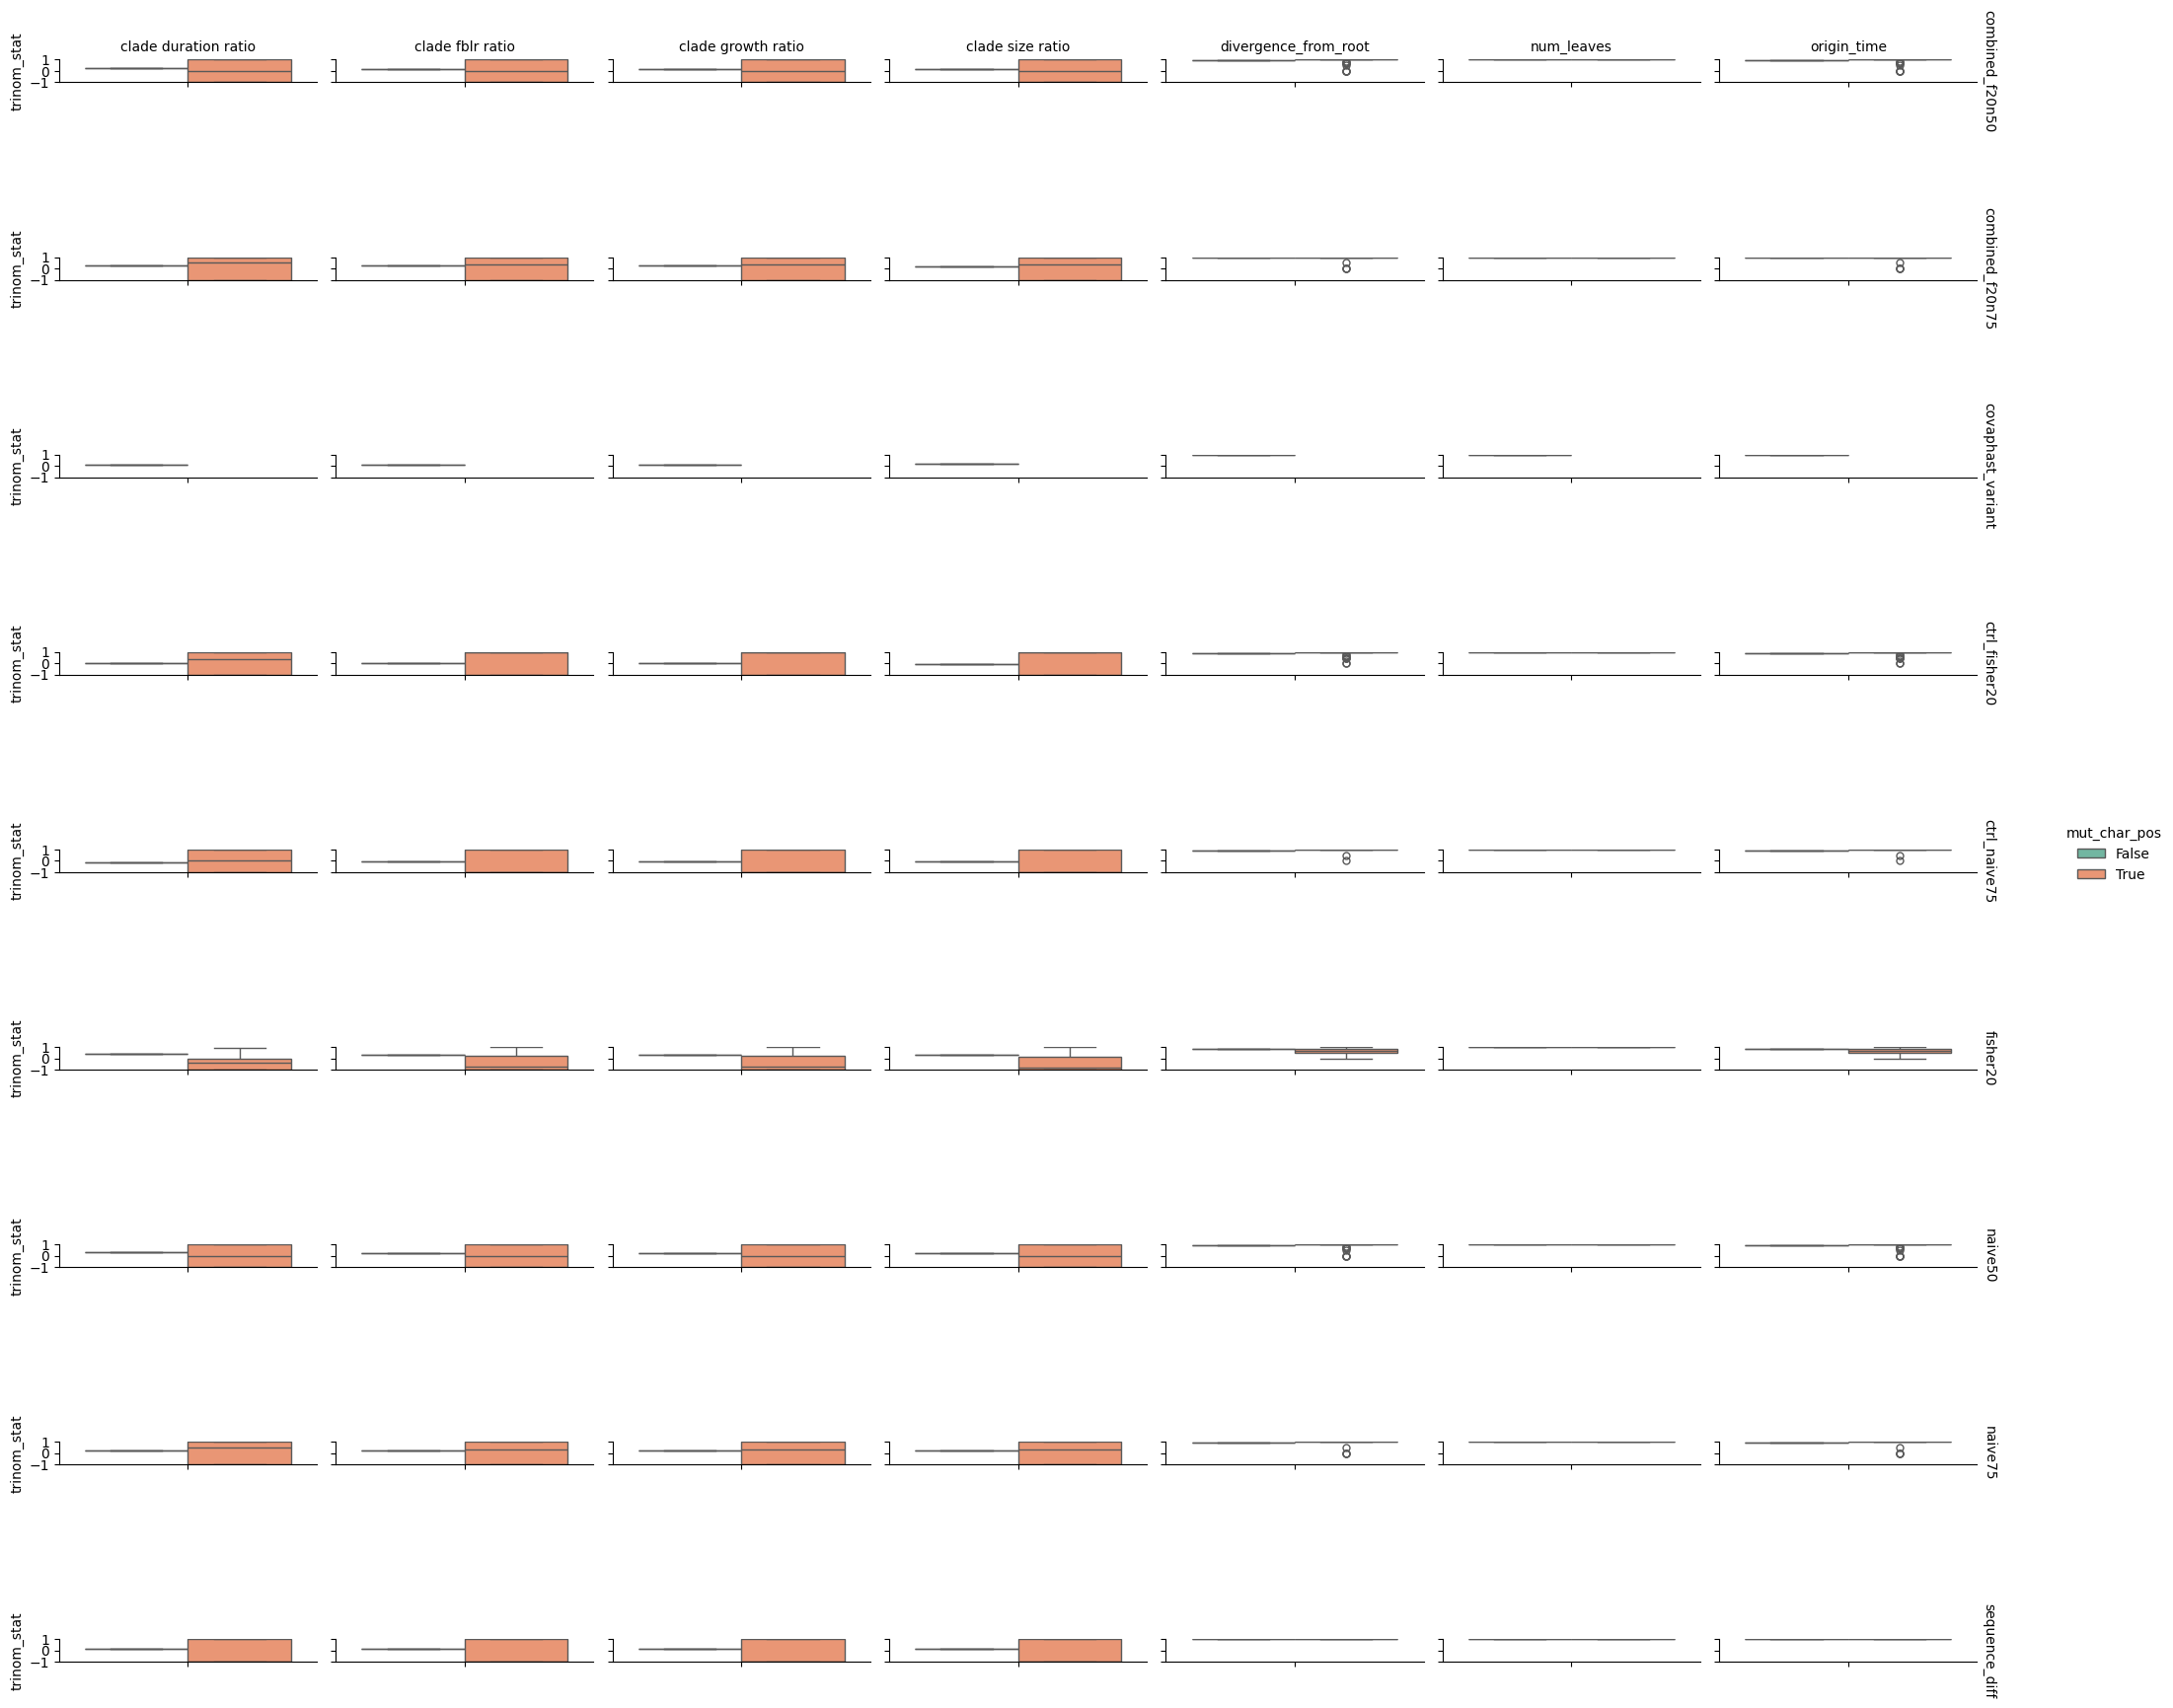

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


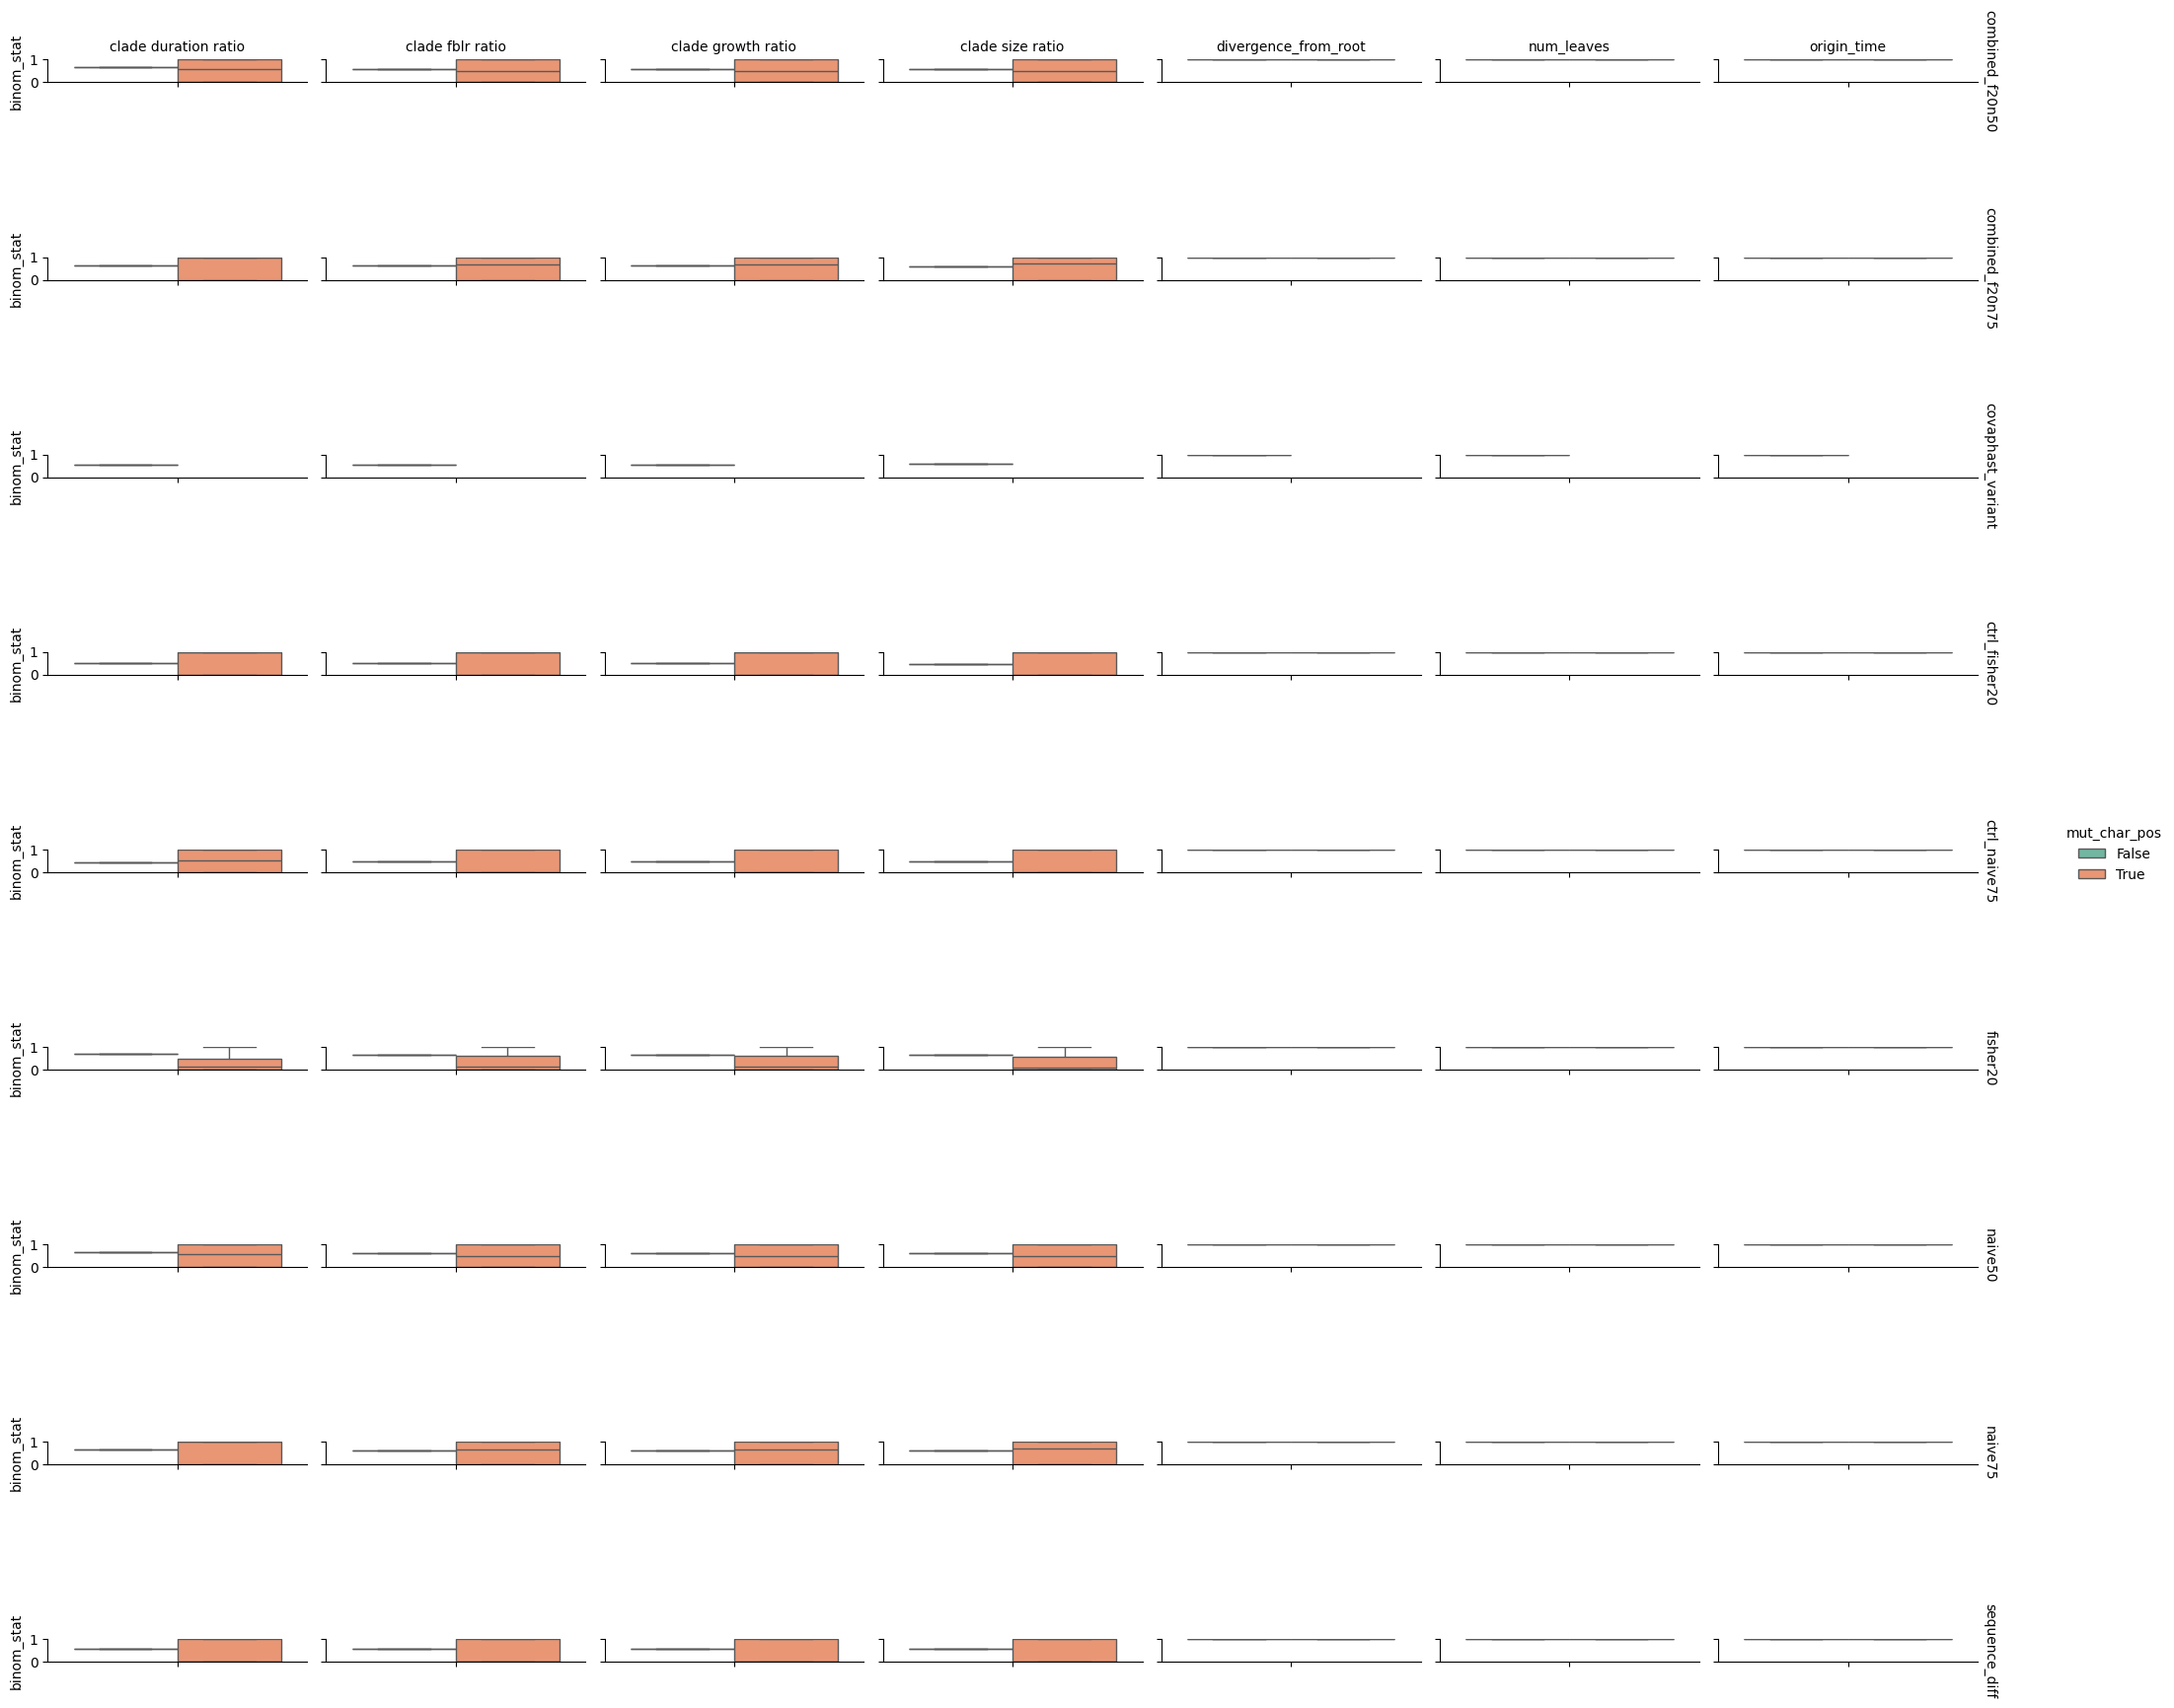

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


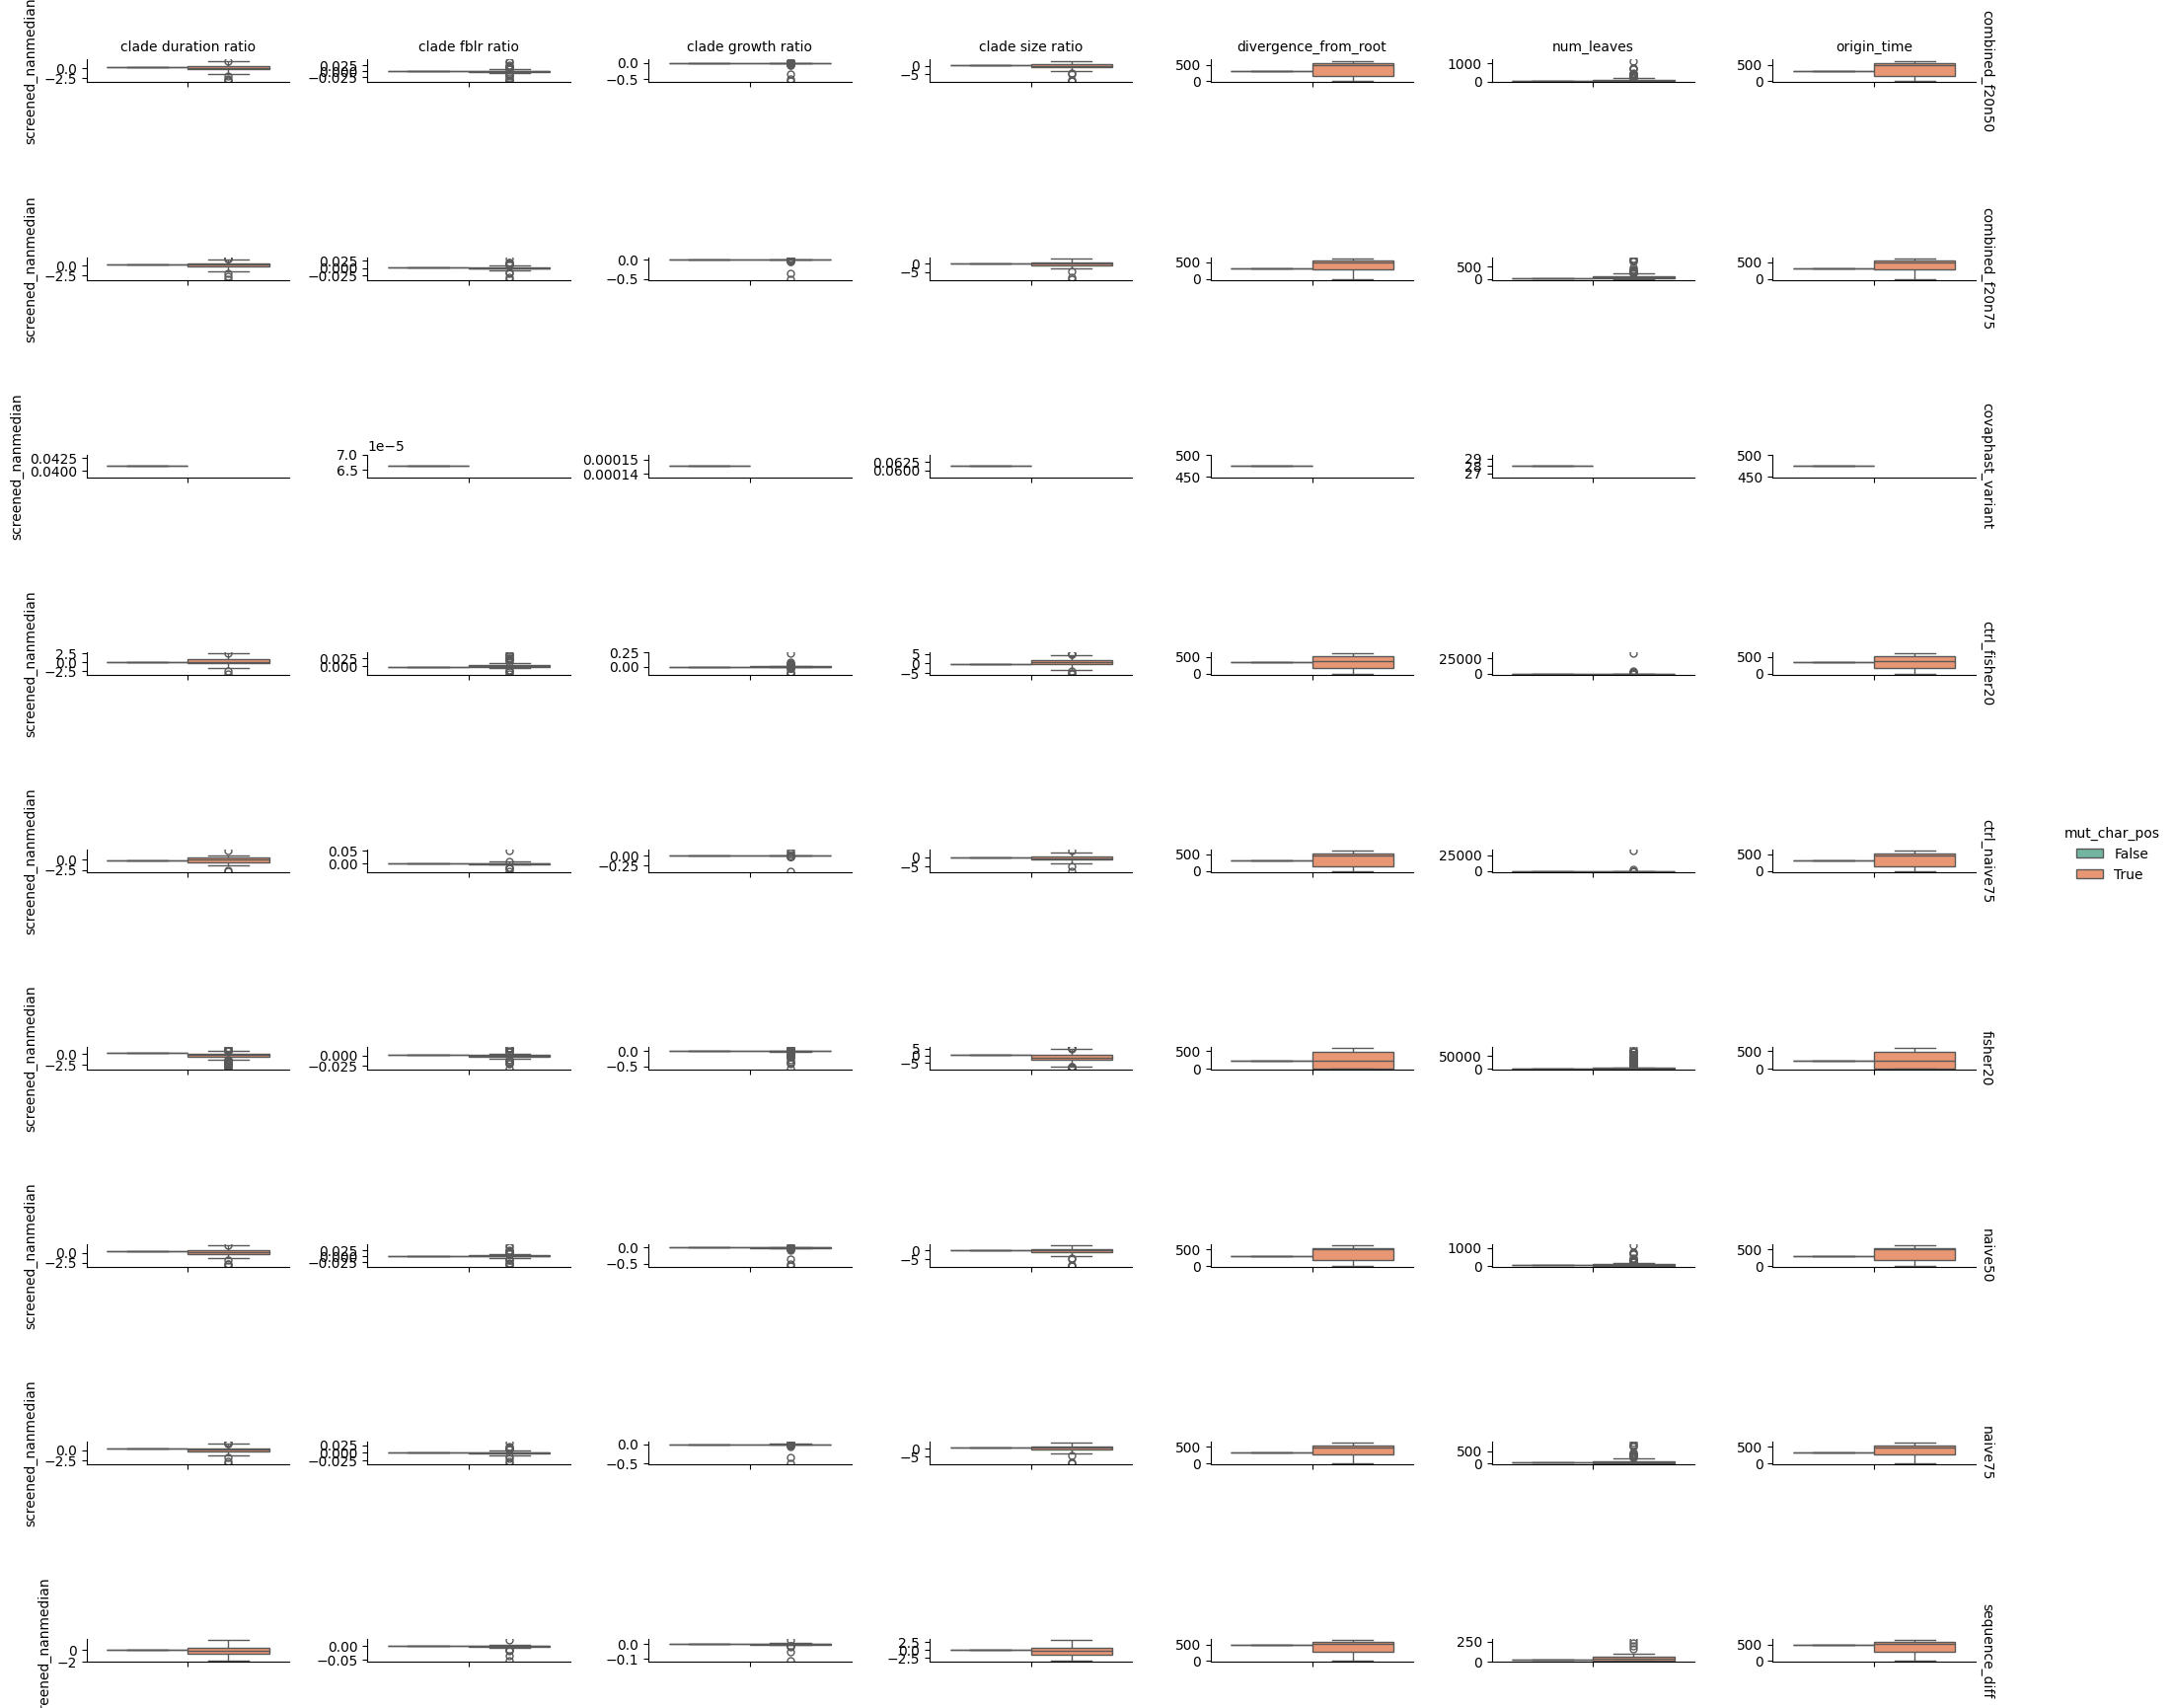

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


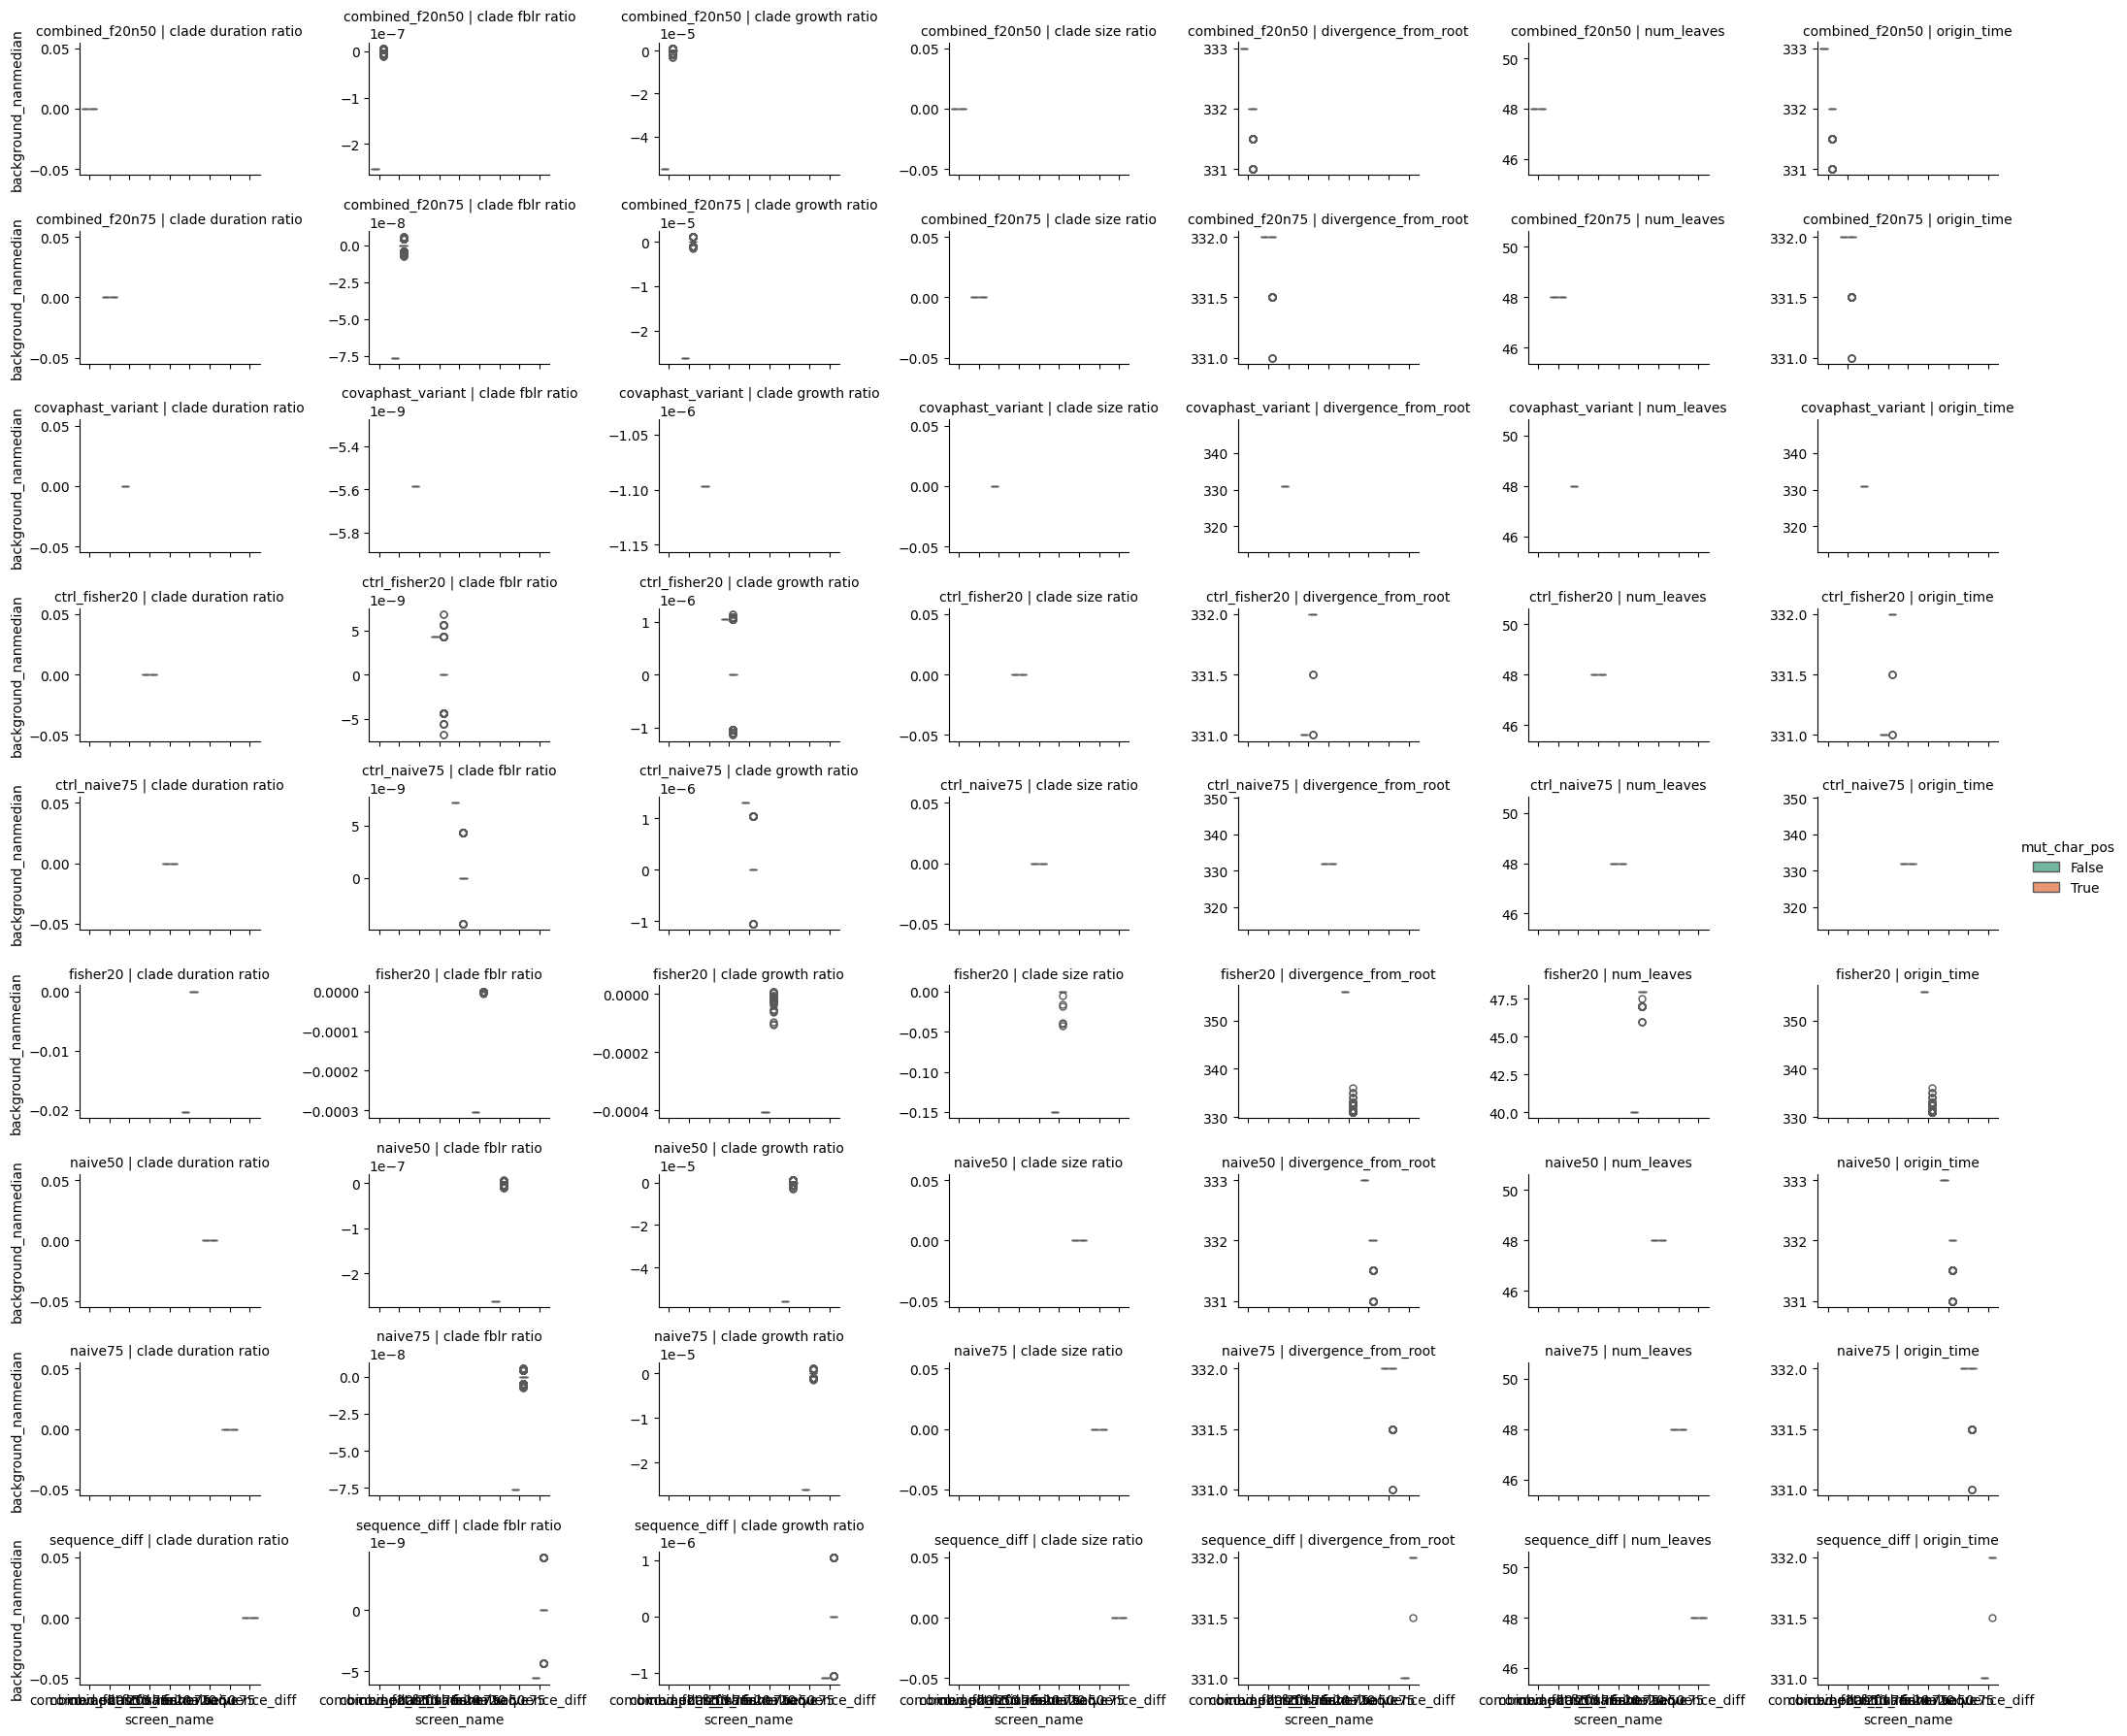

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
